# BTC Price Analysis

###### Import all dependencies

In [18]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
exec(requests.get('https://raw.githubusercontent.com/NumericCamel/PythonScripts/main/investing_com_btc_clean.py').text)

In [33]:
url = 'https://raw.githubusercontent.com/NumericCamel/PythonScripts/main/investing_com_btc_clean.py'

response = requests.get(url)
script_content = response.text
#print(script_content)

with open('investing_com_btc_clean.py', 'w') as file:
    file.write(script_content)

# Step 2: Import the Saved Script as a Module
import investing_com_btc_clean

In [46]:
btc = pd.read_csv('btc_price.csv')
btc_1 = investing_com_btc_clean.clean_dataset(btc)
btc_1 = btc_1.sort_values(by='Date').reset_index(drop=True)
btc_1

,Date,Price,Open,High,Low,Volume,pct_change
0,2023-01-01,16618.4,16537.5,16621.9,16499.7,107840.0,0.0049
1,2023-01-02,16674.3,16618.4,16766.9,16551.0,136030.0,0.0034
2,2023-01-03,16674.2,16673.1,16773.2,16607.2,178730.0,0.0000
3,2023-01-04,16852.1,16674.2,16976.5,16656.5,247390.0,0.0107
4,2023-01-05,16829.8,16852.2,16877.9,16772.3,178960.0,-0.0013
...,...,...,...,...,...,...,...
542,2024-06-26,60849.4,61809.9,62469.4,60715.1,54950.0,-0.0155
543,2024-06-27,61685.3,60848.3,62351.2,60629.4,48790.0,0.0137
544,2024-06-28,60403.3,61684.6,62175.4,60081.9,58950.0,-0.0208
545,2024-06-29,60973.4,60403.7,61192.8,60382.8,26560.0,0.0094


In [47]:
def technical_analysis(df):
    # Create a copy of the input DataFrame
    ta = df.copy()
    
    # 10D MA
    ta['MA'] = ta.Price.rolling(window=10).mean()
    ta['MA_td'] = (ta.Price > ta.MA).astype(int)
    
    # 30D MA
    ta['3MA'] = ta.Price.rolling(window=30).mean()
    ta['3MA_td'] = (ta.Price > ta['3MA']).astype(int)
    
    # %K
    lowest_low = ta.Low.rolling(window=10).min()
    highest_high = ta.High.rolling(window=10).max()
    ta['%K'] = (ta.Price - lowest_low) / (highest_high - lowest_low) * 100
    ta['%K_td'] = (ta['%K'] > ta['%K'].shift(1)).astype(int)
    
    # Calculate %D
    ta['%D'] = ta['%K'].rolling(window=3).mean()
    ta['%D_td'] = (ta['%D'] > ta['%D'].shift(1)).astype(int)
    
    # RSI 
    delta = ta.Price.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    ta['RSI'] = 100 - (100 / (1 + rs))
    
    def RSI_td(rsi_values):
        if rsi_values >= 70:
            return -1
        elif rsi_values <= 30:
            return 1
        else:
            return 0
    
    ta['RSI_td'] = ta.RSI.apply(RSI_td)
    
    # Momentum 
    momentum_window = 10 
    ta['Momentum'] = ta.Price - ta.Price.shift(momentum_window)
    ta['Momentum_td'] = (ta.Momentum > 1).astype(int)
    
    # MACD 12,26,9
    ta['EMA12'] = ta.Price.ewm(span=12, adjust=False).mean()
    ta['EMA26'] = ta.Price.ewm(span=26, adjust=False).mean()
    ta['MACD'] = ta['EMA12'] - ta['EMA26']
    ta['Signal'] = ta['MACD'].ewm(span=9, adjust=False).mean()
    ta['MACD_td'] = (ta['MACD'] > ta['MACD'].shift(1)).astype(int)
    
    # CCI
    ta['TP'] = (ta['High'] + ta['Low'] + ta['Price']) / 3
    
    # Calculate the 20-period Simple Moving Average of the Typical Price
    ta['SMA_TP'] = ta['TP'].rolling(window=20).mean()
    
    def calculate_md(series):
        return abs(series - series.mean()).mean()
    
    ta['MD'] = ta['TP'].rolling(window=20).apply(calculate_md)
    
    # Calculate the CCI
    ta['CCI'] = (ta['TP'] - ta['SMA_TP']) / (0.015 * ta['MD'])
    
    def CCI_td(CCI_values):
        if CCI_values >= 100:
            return -1
        elif CCI_values <= -100:
            return 1
        else:
            return 0
    
    ta['CCI_td'] = ta.CCI.apply(CCI_td)

    return ta

btc_ta = technical_analysis(btc_1)
btc_ta

,Date,Price,Open,High,Low,Volume,pct_change,MA,MA_td,3MA,...,EMA12,EMA26,MACD,Signal,MACD_td,TP,SMA_TP,MD,CCI,CCI_td
0,2023-01-01,16618.4,16537.5,16621.9,16499.7,107840.0,0.0049,NaN,0,NaN,...,16618.400000,16618.400000,0.000000,0.000000,0,16580.000000,NaN,NaN,NaN,0
1,2023-01-02,16674.3,16618.4,16766.9,16551.0,136030.0,0.0034,NaN,0,NaN,...,16627.000000,16622.540741,4.459259,0.891852,1,16664.066667,NaN,NaN,NaN,0
2,2023-01-03,16674.2,16673.1,16773.2,16607.2,178730.0,0.0000,NaN,0,NaN,...,16634.261538,16626.367353,7.894186,2.292319,1,16684.866667,NaN,NaN,NaN,0
3,2023-01-04,16852.1,16674.2,16976.5,16656.5,247390.0,0.0107,NaN,0,NaN,...,16667.775148,16643.088289,24.686859,6.771227,1,16828.366667,NaN,NaN,NaN,0
4,2023-01-05,16829.8,16852.2,16877.9,16772.3,178960.0,-0.0013,NaN,0,NaN,...,16692.702048,16656.918786,35.783262,12.573634,1,16826.666667,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,2024-06-26,60849.4,61809.9,62469.4,60715.1,54950.0,-0.0155,63603.11,0,66793.883333,...,63696.980476,65309.154376,-1612.173900,-957.244308,0,61344.633333,65914.763333,2190.640333,-139.080491,1
543,2024-06-27,61685.3,60848.3,62351.2,60629.4,48790.0,0.0137,63121.76,0,66571.193333,...,63387.491172,65040.720719,-1653.229547,-1096.441356,0,61555.300000,65493.776667,2205.600000,-119.044755,1
544,2024-06-28,60403.3,61684.6,62175.4,60081.9,58950.0,-0.0208,62646.10,0,66330.110000,...,62928.384838,64697.208073,-1768.823235,-1230.917732,0,60886.866667,65069.710000,2249.491333,-123.964124,1
545,2024-06-29,60973.4,60403.7,61192.8,60382.8,26560.0,0.0094,62245.35,0,66084.066667,...,62627.617939,64421.370438,-1793.752498,-1343.484685,0,60849.666667,64634.941667,2280.204167,-110.670645,1


### K-Means Clustering to find support and resistance levels

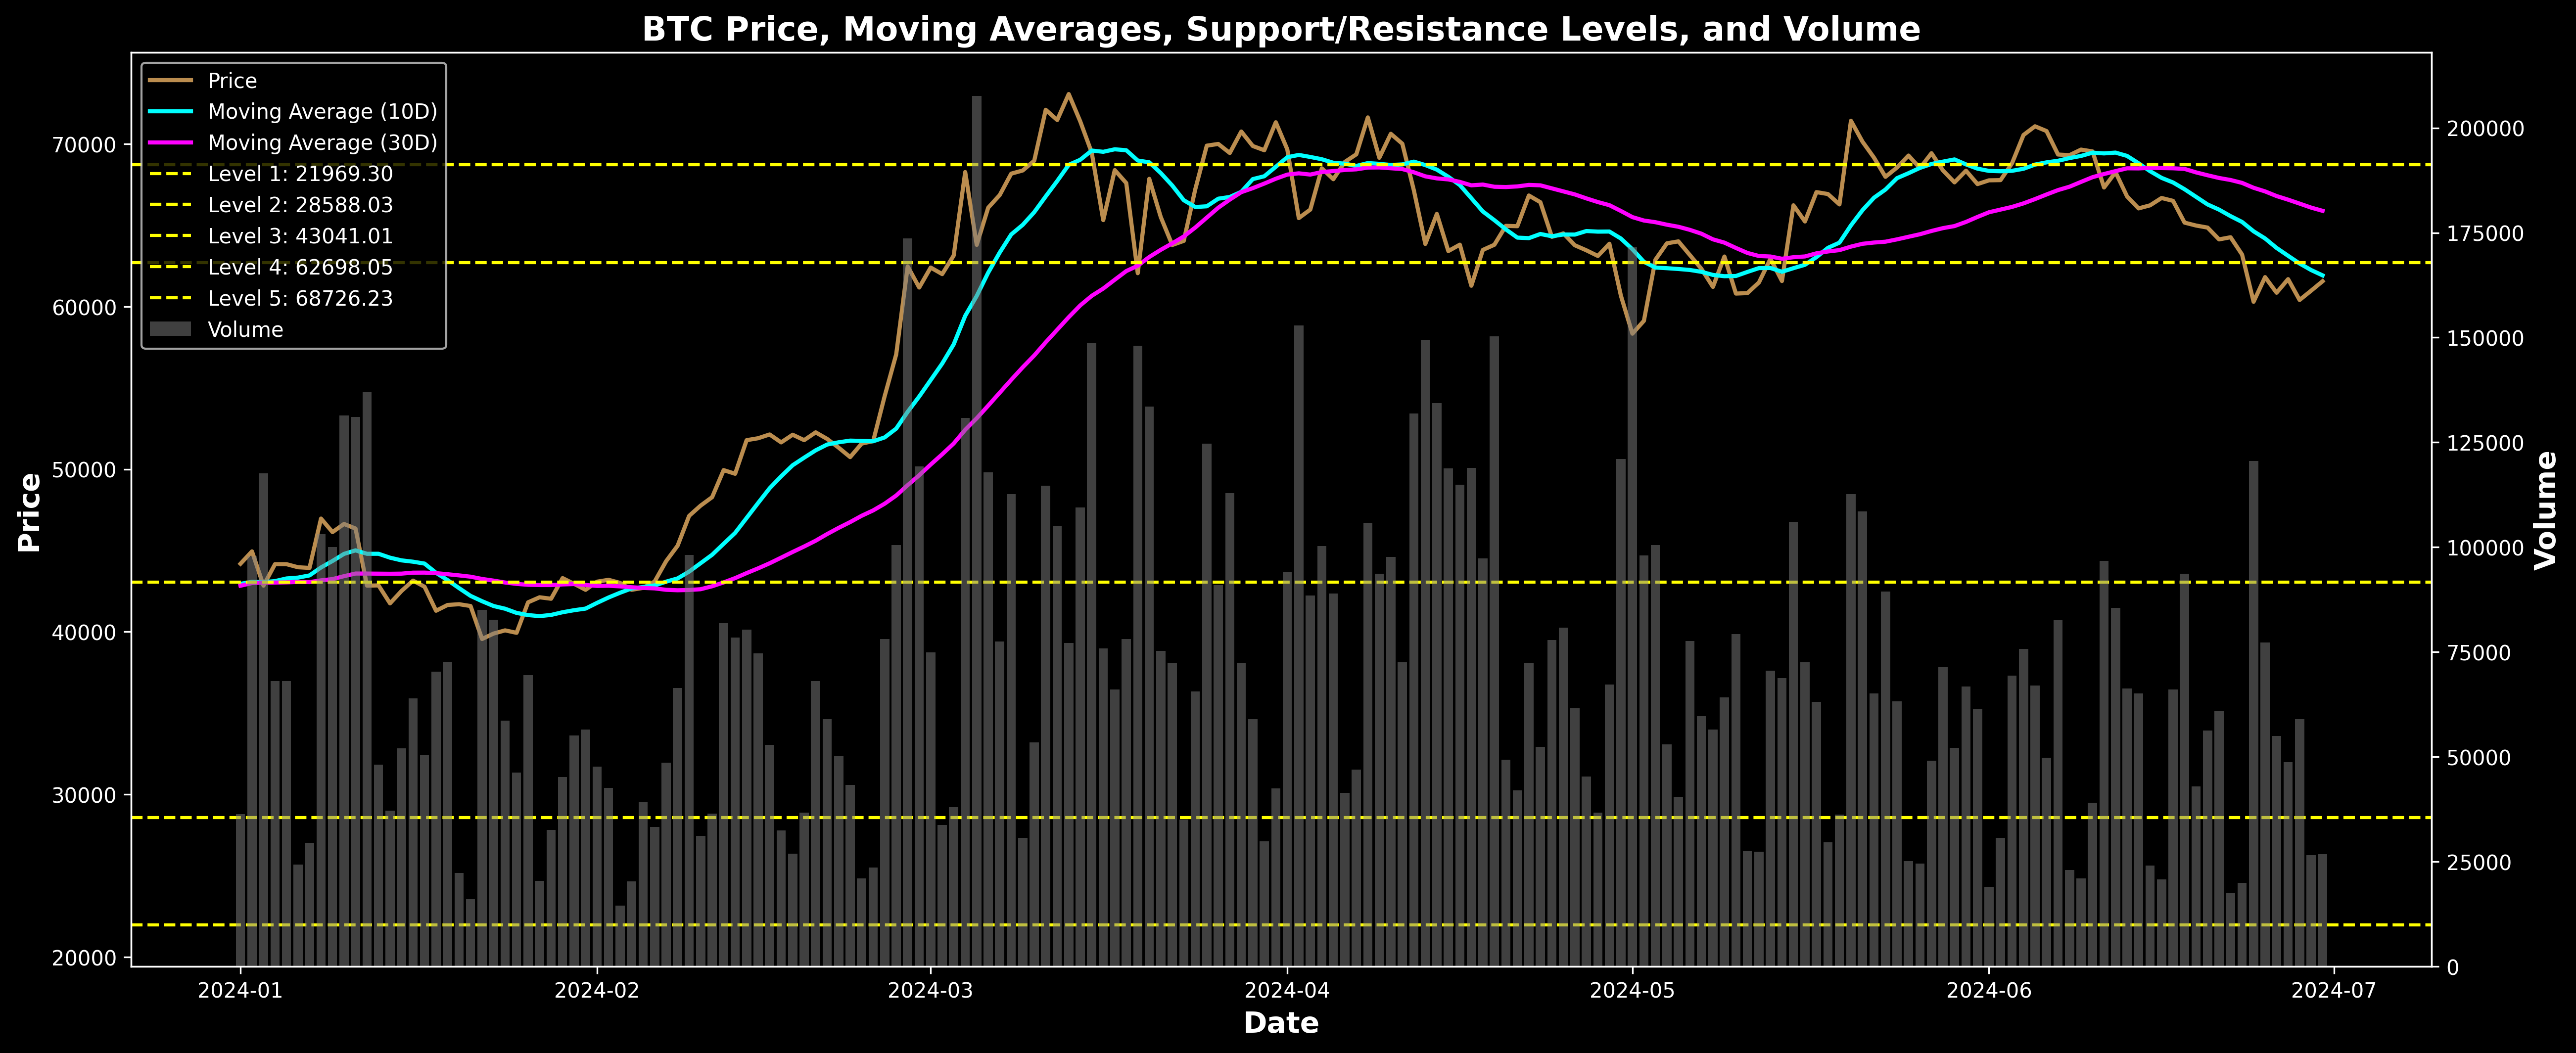

In [65]:
# Filter the data for the year 2024
btc_graph = btc_ta[(btc_ta['Date'].dt.year == 2024) & (btc_ta['Date'].dt.month >= 1)]

# Extract the 'Price' column for clustering
prices = btc_ta['Price'].values.reshape(-1, 1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(prices)

# Get cluster centers (these can be considered as potential support/resistance levels)
cluster_centers = kmeans.cluster_centers_.flatten()

# Sort the levels for better readability
sorted_centers = sorted(cluster_centers)

# Create a DataFrame for the support and resistance levels with sorted names
support_resistance_df = pd.DataFrame({
    'Level': sorted_centers,
    'Type': [f'Level {i+1}' for i in range(len(sorted_centers))]
})

# Plotting the combined chart with enhanced design
plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(20, 8), dpi=300)

# Plot price and moving averages on the first y-axis
ax1.plot(btc_graph.Date, btc_graph.Price, label='Price', color='#BB8D4F', linewidth=2)
ax1.plot(btc_graph.Date, btc_graph.MA, label='Moving Average (10D)', color='#00FFFF', linewidth=2)
ax1.plot(btc_graph.Date, btc_graph['3MA'], label='Moving Average (30D)', color='#FF00FF', linewidth=2)

# Plot support and resistance levels
for i, center in enumerate(sorted_centers):
    ax1.axhline(y=center, color='#FFFF00', linestyle='--', label=f'Level {i+1}: {center:.2f}', linewidth=1.5)

# Set labels and title for the first y-axis
ax1.set_xlabel('Date', fontsize=14, fontweight='bold', color='white')
ax1.set_ylabel('Price', fontsize=14, fontweight='bold', color='white')
ax1.set_title('BTC Price, Moving Averages, Support/Resistance Levels, and Volume', fontsize=16, fontweight='bold', color='white')
ax1.legend(loc='upper left', fontsize=10)

# Create a second y-axis for the volume bar graph
ax2 = ax1.twinx()
ax2.bar(btc_graph.Date, btc_graph.Volume, color='#808080', alpha=0.5, label='Volume')

# Set the label for the second y-axis
ax2.set_ylabel('Volume', fontsize=14, fontweight='bold', color='white')

# Set x-ticks rotation for better readability
plt.xticks(rotation=45, fontsize=10, color='white')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)

# Show the combined chart
plt.show()